In [1]:
# loading needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
# loading the data into a dataframe
df = pd.read_csv(r'../Chapter4/input/Advertising.csv' ,index_col=0)

In [3]:
y = df.Sales
X = df.TV
X = sm.add_constant(X)

lr_model = sm.OLS(y,X).fit()

print(lr_model.summary())
print(lr_model.params)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.47e-42
Time:                        20:49:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Text(0, 0.5, 'Sales')

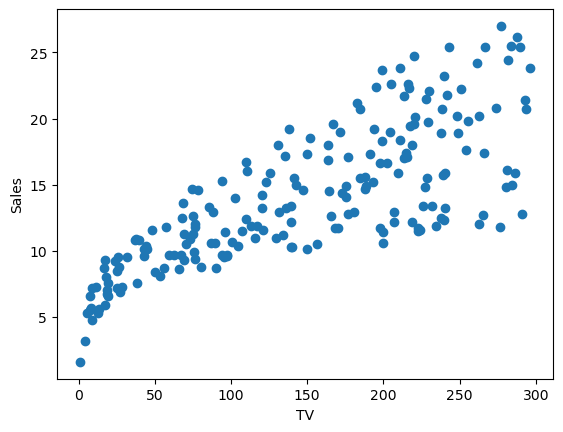

In [4]:
# visualize the data
plt.figure()
plt.scatter( df.TV, df.Sales)
plt.xlabel("TV")
plt.ylabel("Sales")

In [5]:
# Now check radio
# y has already been defined
X = df.Radio
X = sm.add_constant(X)

lr_model_radio = sm.OLS(y,X).fit()

print(lr_model_radio.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           4.35e-19
Time:                        20:49:40   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

Text(0, 0.5, 'Sales')

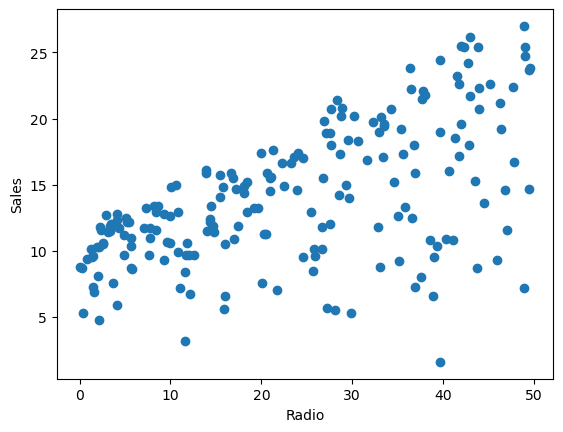

In [6]:
# get an initial plot
plt.figure()
plt.scatter(df.Radio, y)
plt.xlabel("Radio")
plt.ylabel("Sales")

In [7]:
X = df[["TV" , "Radio"]]
X = sm.add_constant(X)

In [8]:
lr_multi_model = sm.OLS(y,X).fit()

In [9]:
print(lr_multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        20:49:46   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

In [10]:
# plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
n_samples = 100

lin_grid_var = lambda column: np.linspace(X[column].min(), X[column].max(), n_samples)

X_axis, Y_axis = np.meshgrid(lin_grid_var('TV') , lin_grid_var('Radio'))

In [11]:
# create input for model
X_ = sm.add_constant(X_axis.flatten())

In [12]:
Y_flatten = Y_axis.flatten()

In [13]:
Y_ = Y_flatten.reshape((-1,1))


In [14]:
Y_.shape

(10000, 1)

In [15]:
input_mat = np.append ( X_, Y_,   1  )

In [16]:
# plot the hyperplane by calculating the corresponding Z axis (sales)
Z_predicted = lr_multi_model.predict( input_mat )
Z_predicted_reshaped = np.reshape(Z_predicted, (100,-1))

In [17]:
# Z_book = lr_multi_model.params[0] + lr_multi_model.params[1] * X_axis + lr_multi_model.params[2] * Y_axis

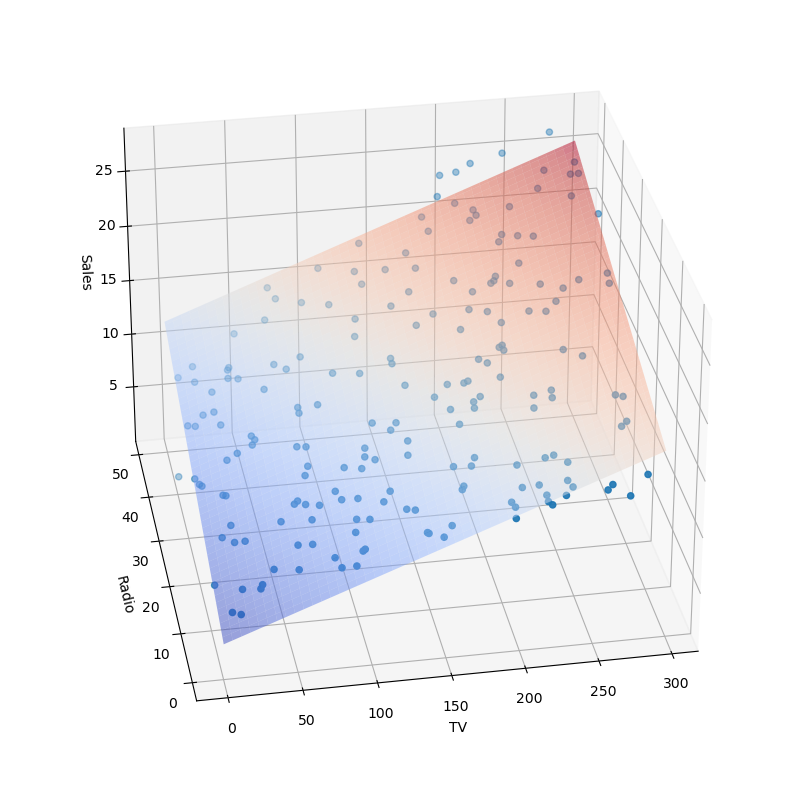

In [56]:
# create the plot with my variable
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d' , azim=-100)

ax.plot_surface(X_axis, Y_axis, Z_predicted_reshaped ,cmap = plt.cm.coolwarm ,alpha=0.5 , linewidth =0)
ax.scatter(X.TV, X.Radio, y)
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Sales")
plt.show()
